# Supervised Machine Learning

In this notebook, we'll take a look at supervised machine learning algorithms.

## Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

X sample:
 [[  9.96346605   4.59676542]
 [ 11.0329545   -0.16816717]
 [ 11.54155807   5.21116083]]

y sample:
 [1 0 1]



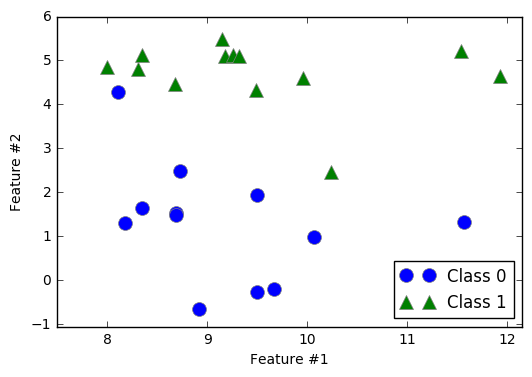

In [3]:
# Data seperation is taken care of with mglearn.datasets
X, y = mglearn.datasets.make_forge()
print("X sample:\n {}\n".format(X[0:3, :]))
print("y sample:\n {}\n".format(y[0:3]))

# Visualize
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("Feature #1")
plt.ylabel("Feature #2")

## Regression

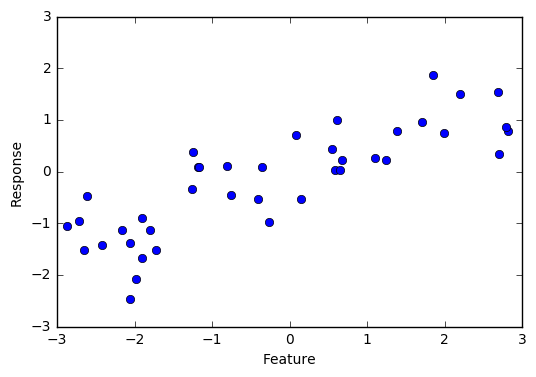

In [4]:
X_2, y_2 = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X_2, y_2, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Response")

## Cancer Dataset

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Inspecting the number of features in the data and responses
print("Shape of cancer dataset: {}\n".format(cancer["data"].shape))
print("cancer.keys(): {}\n".format(cancer.keys()))

Shape of cancer dataset: (569, 30)

cancer.keys(): dict_keys(['DESCR', 'feature_names', 'target', 'data', 'target_names'])



In [6]:
print(cancer["target_names"])
print(np.bincount(cancer["target"]))

['malignant' 'benign']
[212 357]


In [7]:
# We can use zip() on same size target_names and np.bincount(target)
print("{}".format({name: value for name, value in zip(cancer["target_names"], np.bincount(cancer["target"]))}))

{'malignant': 212, 'benign': 357}


In [8]:
print("Feature names: \n{}".format(cancer["feature_names"]))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Boston Dataset

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Boston Dataset Shape: {}".format(boston["data"].shape))

Boston Dataset Shape: (506, 13)


In [10]:
X_3, y_3 = mglearn.datasets.load_extended_boston()
print("Shape of Ext Boston Dataset: {}".format(X_3.shape))

Shape of Ext Boston Dataset: (506, 104)


# k-Neighbors Classification 

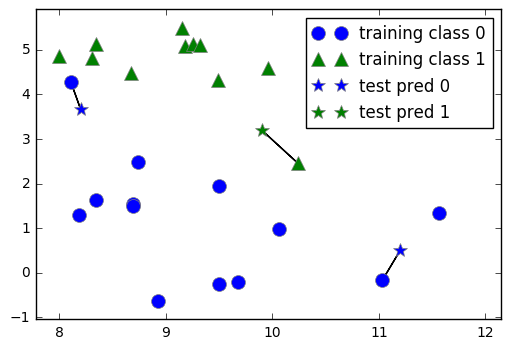

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

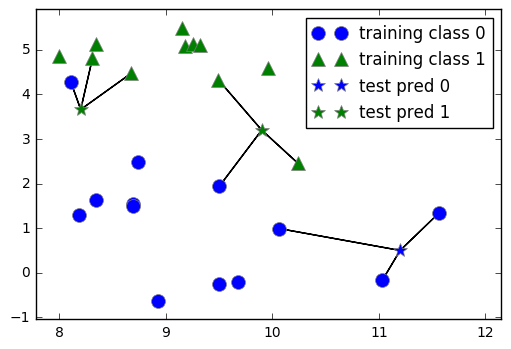

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
# Import dataset, train_test_split
X, y = mglearn.datasets.make_forge()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

knn_clf.fit(X_train, y_train)
print("Predictions on test set: \n{}".format(knn_clf.predict(X_test)))

Predictions on test set: 
[1 0 1 0 1 0 0]


In [15]:
# Comparing y_test and our predictions -- knn_clf.score() predicts, then compares to actual
print("Test set accuracy: {:.2f}".format(knn_clf.score(X_test, y_test)))

Test set accuracy: 0.86


## Analyzing KNeighbors Classifier

/Users/mohsin/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/mohsin/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


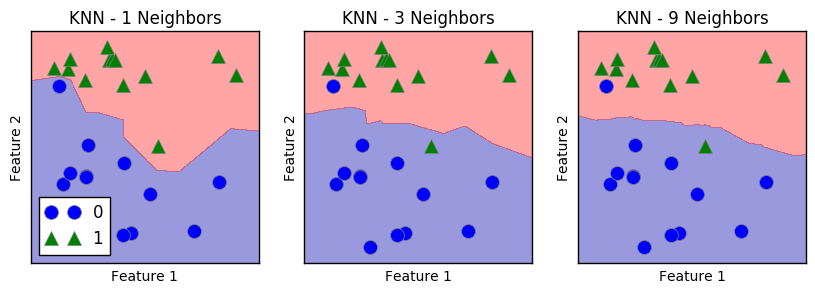

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    axis_knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    
    mglearn.plots.plot_2d_separator(axis_knn_clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title("KNN - {} Neighbors".format(n_neighbors))
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
axes[0].legend(loc=3)

As the number of neighbors increase, the likelihood of overfitting decreases. Not only that, but the curve is smoother as a result.

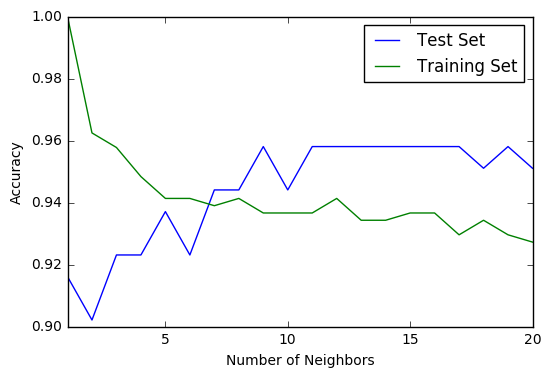

In [17]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], \
                                                    random_state=0)

n_neighbors = [i for i in range(1, 21)]
train_accuracy_list, test_accuracy_list = [], []

for neighbor in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=neighbor)
    knn_clf.fit(X_train, y_train)
    
    # Scores on training set will decrease as neighbors increase (simpler model)
    train_accuracy_list.append(knn_clf.score(X_train, y_train))
    # Scores on test set will increase as neighbors increase (simpler model)
    test_accuracy_list.append(knn_clf.score(X_test, y_test))

plt.plot(n_neighbors, test_accuracy_list, label="Test Set")
plt.plot(n_neighbors, train_accuracy_list, label="Training Set")
plt.xlabel("Number of Neighbors")
plt.xlim(1, 20)
plt.ylabel("Accuracy")
plt.legend()

## k-neighbors regression

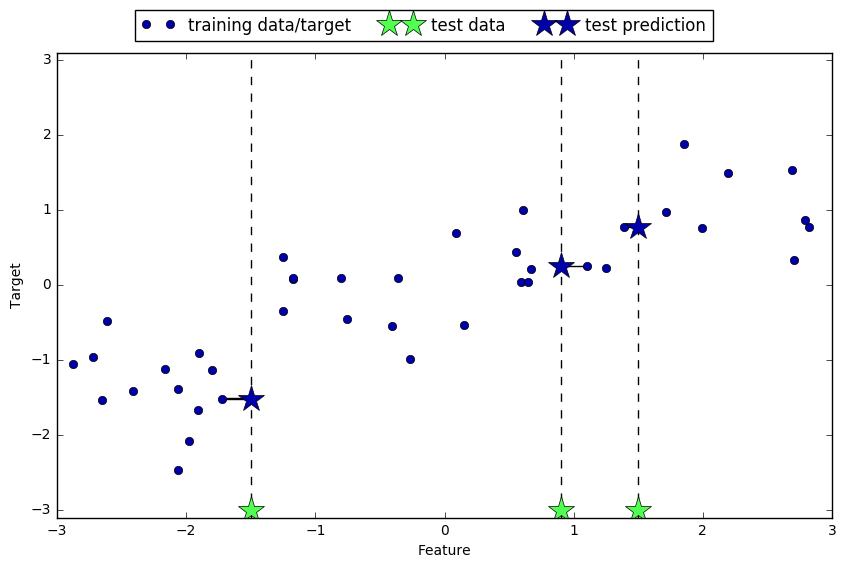

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

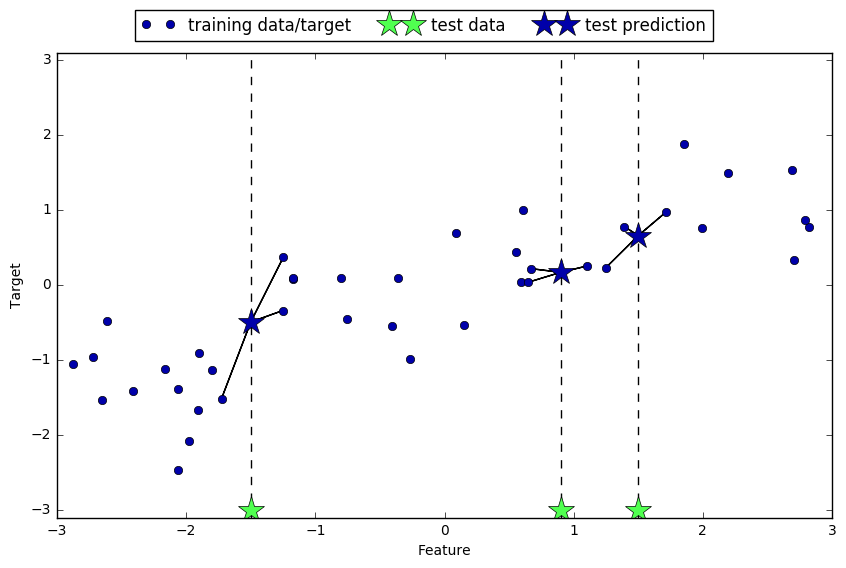

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [20]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

new_knn = KNeighborsRegressor(n_neighbors=3)

new_knn.fit(X_train, y_train)

print("Feature: {} \nPrediction: {}\n".format(X_test.ravel(), new_knn.predict(X_test)))
print("KNeighborsRegressor Score: {:.2f}".format(new_knn.score(X_test, y_test) * 100.0))

Feature: [-0.35908504 -2.72129752 -1.80195731  1.39196365  2.81945911  2.7937922
 -2.41396732  0.67111737 -0.80182894 -1.25262516] 
Prediction: [-0.65851598 -1.02040464 -1.36390047  0.48363492  1.12082662  1.12082662
 -1.04203645  0.35686046 -0.08973653  0.18400081]

KNeighborsRegressor Score: 78.26


Import to note: Here, KNeighborsRegressor's score is continously changing with the above code since a random_state was not provided to train_test_split. If you continually call the cell above multiple times (without setting random_state), you will get a different score every single time. Some of them are very bad scores, others, very good, depending on how the test set was structured.

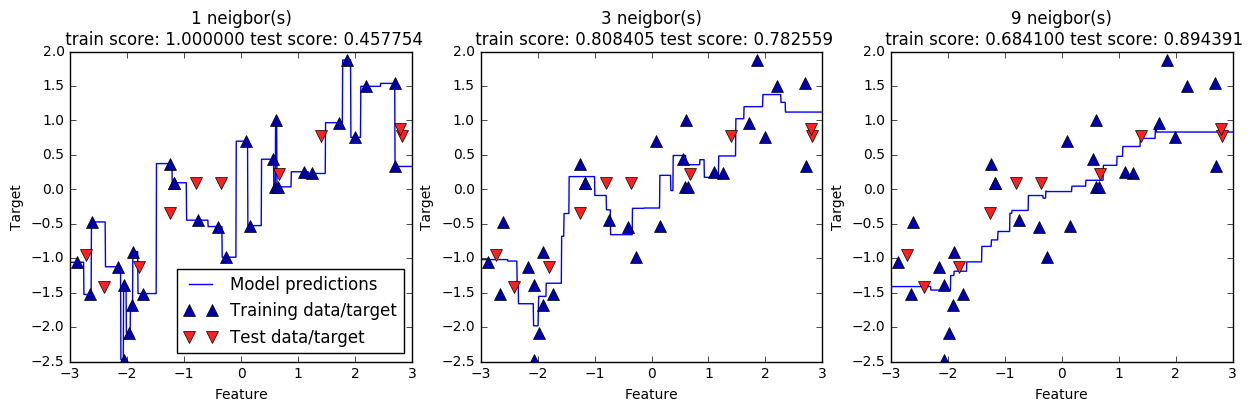

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# -3 to 3, 1000 granularity (points)
line = np.linspace(-3, 3, 1000).reshape(-1, 1) # reshape(-1, 1) --> flat to 2D vert (expand_dims equiv)
for n_neighbors, ax in zip([1, 3, 9], axes):
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_regressor.fit(X_train, y_train)
    
    ax.plot(line, knn_regressor.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neigbor(s)\n train score: {:2f} test score: {:2f}"\
                 .format(n_neighbors, knn_regressor.score(X_train, y_train), \
                         knn_regressor.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

As we can see, the two models on the right don't have an attractive test score, despite a simpler model.

## Linear Models

w[0]: 0.393906  b: -0.031804


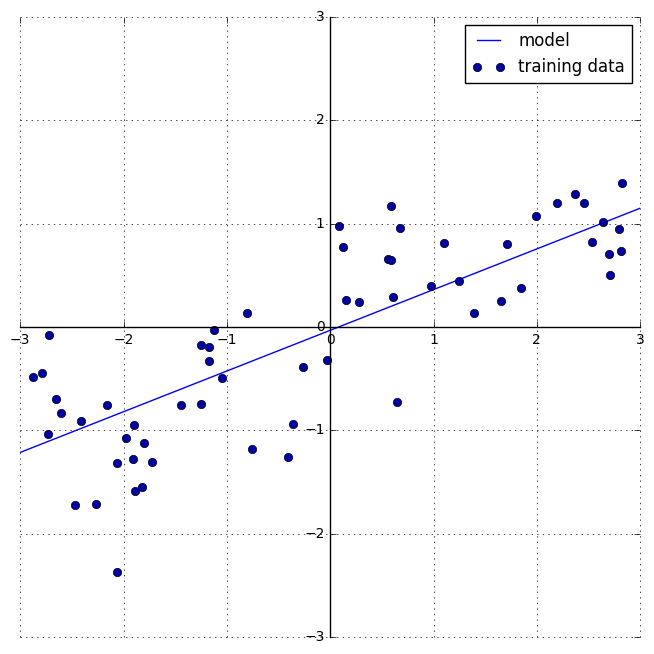

In [24]:
mglearn.plots.plot_linear_regression_wave()

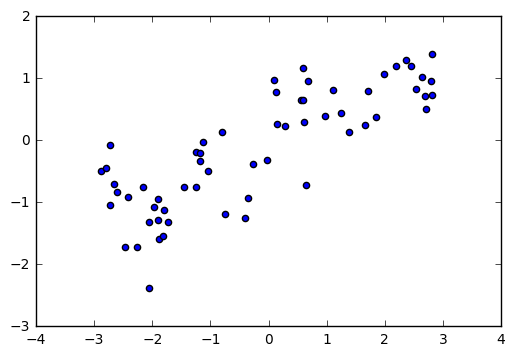

In [27]:
X, y = mglearn.datasets.make_wave(n_samples=60)

plt.scatter(X, y)

m: 0.39390555116733955 b: -0.031804343026759746
Accuracy on training set: 67.01%
Accuracy on test set: 65.93%


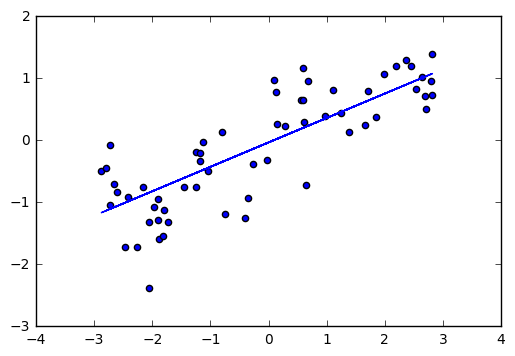

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)
lr.predict(X_test)

# lr.coef_ is an array, where each entry represents a parameter
print("m: {} b: {}".format(lr.coef_[0], lr.intercept_))

print("Accuracy on training set: {:.2f}%".format(lr.score(X_train, y_train) * 100))
print("Accuracy on test set: {:.2f}%".format(lr.score(X_test, y_test) * 100))

plt.scatter(X, y)
plt.plot(X_train, lr.predict(X_train))

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.load_extended_boston()

# 104 features --> high dimensional
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lreg = LinearRegression()

lreg.fit(X_train, y_train)
print("REGULAR LINEAR REGRESSION")
print("Accuracy on train set: {:.2f}%".format(lreg.score(X_train, y_train) * 100))
print("Accuracy on test set: {:.2f}%".format(lreg.score(X_test, y_test) * 100))

REGULAR LINEAR REGRESSION
Accuracy on train set: 95.24%
Accuracy on test set: 60.58%


In [127]:
# Zero alpha --> same results as Linear, no difference
ridge_regressor = Ridge(alpha=0.0)
ridge_regressor.fit(X_train, y_train)

print("RIDGE REGRESSION, λ = 0")
print("Ridge Regressor score on train data: {}%".format(ridge_regressor.score(X_train, y_train) * 100))
print("Ridge Regressor score on test data: {}%".format(ridge_regressor.score(X_test, y_test) * 100))

RIDGE REGRESSION, λ = 0
Ridge Regressor score on train data: 95.1492872700045%
Ridge Regressor score on test data: 61.295900502581745%


In [128]:
# 1 alpha (default) --> Better test set accuracy
from sklearn.linear_model import Ridge

ridge_regressor1 = Ridge()

ridge_regressor1.fit(X_train, y_train)

print("RIDGE REGRESSION, λ = 1")
print("Ridge Regressor score on train data: {}%".format(ridge_regressor1.score(X_train, y_train) * 100))
print("Ridge Regressor score on test data: {}%".format(ridge_regressor1.score(X_test, y_test) * 100))

RIDGE REGRESSION, λ = 1
Ridge Regressor score on train data: 88.60578560395835%
Ridge Regressor score on test data: 75.27139600306947%


In [129]:
# 10 alpha --> high penalization, didn't help us much.. too much penalization
ridge_regressor10 = Ridge(alpha=10.0)
ridge_regressor10.fit(X_train, y_train)

print("RIDGE REGRESSION, λ = 10")
print("Ridge Regressor score on train data: {}%".format(ridge_regressor10.score(X_train, y_train) * 100))
print("Ridge Regressor score on test data: {}%".format(ridge_regressor10.score(X_test, y_test) * 100))

RIDGE REGRESSION, λ = 10
Ridge Regressor score on train data: 78.83461511233251%
Ridge Regressor score on test data: 63.589673274477335%


In [130]:
# 0.1 alpha --> just right...
ridge_regressor01 = Ridge(alpha=0.1)
ridge_regressor01.fit(X_train, y_train)

print("RIDGE REGRESSION, λ = 0.1")
print("Ridge Regressor score on train data: {}%".format(ridge_regressor01.score(X_train, y_train) * 100))
print("Ridge Regressor score on test data: {}%".format(ridge_regressor01.score(X_test, y_test) * 100))

RIDGE REGRESSION, λ = 0.1
Ridge Regressor score on train data: 92.85782082010729%
Ridge Regressor score on test data: 77.1793368884491%


Sums are going down as we increase reg parameter
Sum of parameters, λ=0.0 --> 3621.1380671968845
Sum of parameters, λ=0.1 --> -23.39344605602709
Sum of parameters, λ=10 --> -30.330155895836715


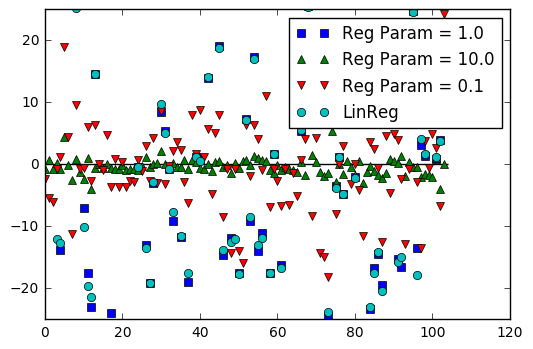

In [136]:
# Showcase the magnitude of parameters with different applications of alpha/lambda
plt.plot(ridge_regressor.coef_, "s", label="Reg Param = 1.0")
plt.plot(ridge_regressor10.coef_, "^", label="Reg Param = 10.0")
plt.plot(ridge_regressor01.coef_, "v", label="Reg Param = 0.1")

plt.plot(lreg.coef_, "o", label="LinReg")
plt.hlines(0, 0, len(lreg.coef_))
plt.ylim(-25, 25)
plt.legend()

print("Sums are going down as we increase reg parameter")
print("Sum of parameters, λ=0.0 --> {}".format(sum(ridge_regressor.coef_)))
print("Sum of parameters, λ=0.1 --> {}".format(sum(ridge_regressor01.coef_)))
print("Sum of parameters, λ=10 --> {}".format(sum(ridge_regressor10.coef_)))

In [138]:
print("Above diagram shows values of features, where X axis is the feature number and the y axis is its value")

Above diagram shows values of features, where X axis is the feature number and the y axis is its value
